# CHAPTER 1 - The Characteristics of Time Series Data Simplified
_pg. 7-16_

## Create a Simple Time Series Using Python

The first example shows how to generate data given Equation 1.1 from the book,  
  
$$y_{t} = \alpha + \beta y_{t-1} + \epsilon_{t}$$
  
where,  
  
$$y_{0}=1, \beta=0.95, \alpha=-0.25$$
  
and $\epsilon_{t}$ is a random number from a uniform distribution in the range $[-1,1]$.

#### CODE THE MODEL
_pg. 9-10_

We start by importing the modules we will need to use.

In [1]:
# p. 9-10
import pandas as pd
import numpy as np

Create a few global variables associated with the model

In [2]:
y_0 = 1
alpha = -0.25
beta = 0.95

Define the number of samples (steps) we wish to create.

In [3]:
n_steps = 10

Deal with random number generation.

In [4]:
seed = 2016
np.random.seed(seed)

Initiate the time series with the initial value of $y_0$.

In [5]:
y = pd.Series(y_0)

Now we use the model to calculate $y_t$ at each time step.

In [6]:
# PYTHON 2.7
# use xrange instead of range if you have many steps/samples to save memory
for step in xrange(n_steps):
    y_t = alpha + (beta * y_0) + np.random.uniform(-1,1)
    y = y.set_value(step, y_0)
    y_0 = y_t

Did it work?

In [7]:
print "Values of y are:"
print y

Values of y are:
0    1.000000
1    1.493411
2    1.629219
3    1.864309
4    2.004397
5    1.578358
6    1.534571
7    0.657570
8    0.791785
9    0.996448
dtype: float64


## Visualize the Data

Here we will recreate Figure 1.2 and Figure 1.3 from page 11.

When plotting with a Jupyter notebook, we need a magic function, which tells Jupyter to show the plot within the notebook. 

Additionally, we will need the `matplotlib` module for plotting.

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# A nice predefined plotting style
matplotlib.style.use('ggplot')

We may also want to control the size of the plot in the notebook.

In [9]:
plt.rcParams['figure.figsize'] = (12,6)

Now we can define the plots.

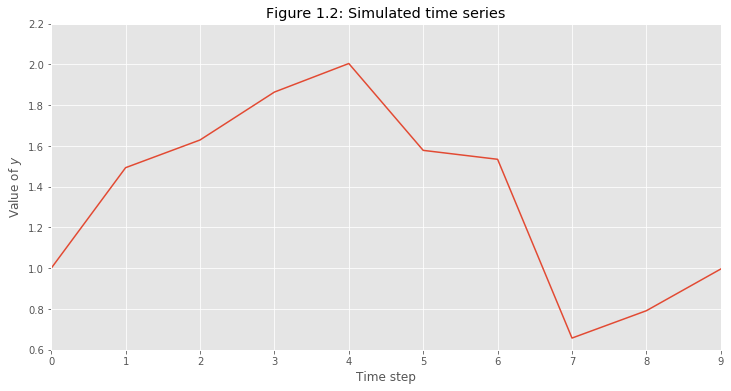

In [10]:
# Figure 1.2 (p.11)
y.plot()

plt.title("Figure 1.2: Simulated time series")
plt.xlabel("Time step")
plt.ylabel("Value of $y$")
plt.xlim([0,9])
plt.ylim([0.6, 2.2])

plt.show()

In [11]:
# Figure 1.3 (p. 11)

# We need to rerun the model for 1000 samples
# Remember to re-initialize the variables we created above, i.e., y, y_0
# Also, reset the random seed

n_steps = 1000
np.random.seed(seed)
y_0 = 1
y = pd.Series(y_0)

for step in range(n_steps):
    y_t = alpha + (beta * y_0) + np.random.uniform(-1,1)
    y = y.set_value(step, y_0)
    y_0 = y_t

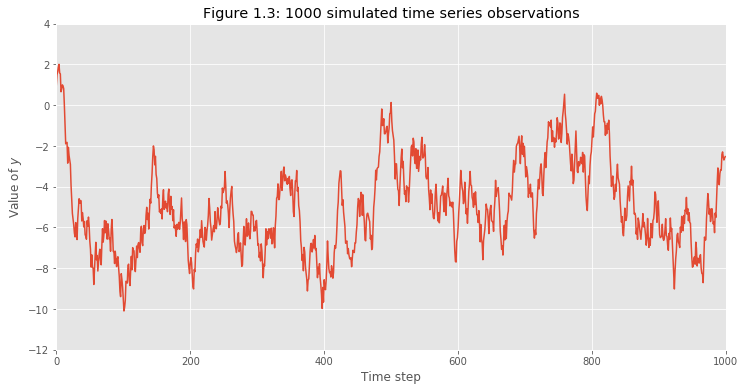

In [12]:
y.plot()
plt.title("Figure 1.3: 1000 simulated time series observations")
plt.xlabel("Time step")
plt.ylabel("Value of $y$")
plt.xlim([0, 1000])
plt.ylim([-12, 4])
plt.show()

## The Importance of Temporal Order

In [13]:
print y.head(10).sort_values()

7    0.657570
8    0.791785
9    0.996448
0    1.000000
1    1.493411
6    1.534571
5    1.578358
2    1.629219
3    1.864309
4    2.004397
dtype: float64


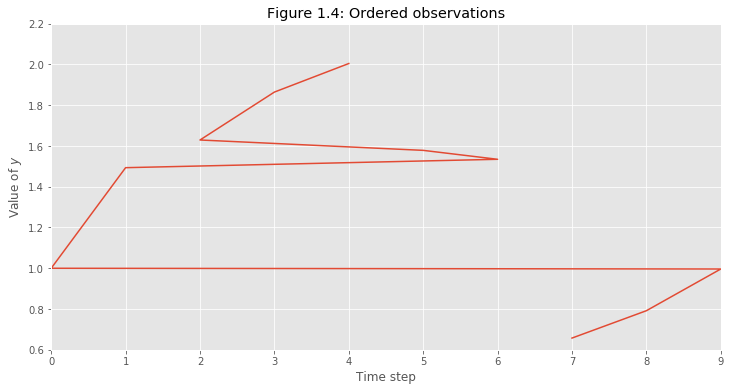

In [14]:
# Figure 1.4 (p.14)
y.head(10).sort_values().plot()

plt.title("Figure 1.4: Ordered observations")
plt.xlabel("Time step")
plt.ylabel("Value of $y$")
plt.xlim([0,9])
plt.ylim([0.6, 2.2])

plt.rcParams['figure.figsize'] = (6,6)

plt.show()

#### OPTIONAL
How to nicely format decimal values in Python 2.7  
`{:<number_spaces>.<display_precision>f}`

In [15]:
for val in y.values[:3]:
    print "{:.4f} {:20.2f}".format(val, val*2)
    print "{:6.2f} {:20.16f}".format(val, val**2)
    print

1.0000                 2.00
  1.00   1.0000000000000000

1.4934                 2.99
  1.49   2.2302755576693887

1.6292                 3.26
  1.63   2.6543532663055291

